# Домашнє завдання №11

Створення рекурентної нейронної мережі за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

Застосувати наступні будови мережі: RNN, LSTM, двосторонню та глибоку.

Порівняйти результати та зробити висновки.

#### 1. Завантаження та підготовка даних

In [1]:
from keras.utils import pad_sequences
from tensorflow import keras
from keras.datasets import imdb

In [2]:
# Встановлюємо гіперпараметри
max_features = 15000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [3]:
# Завантаження даних
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів.
# Залишаться лише ті слова, які зустрічаються не менше 15 000 разів, більш рідкісні будуть проігноровані.
# Це обмеження слів призначене для зменшення розміру векторів слів, що полегшує роботу з моделями

In [4]:
# Передпроцесинг послідовних даних
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [5]:
# Підготовимо ф-ю візуалізації втрат та точності
def plot_acc_loss():
  history_dict = history.history
  epochs = range(1, len(history_dict['acc']) + 1)

  plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
  plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
  plt.title(f'Training and validation loss ({model_name})')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.clf()
  plt.plot(epochs, history_dict['acc'], label='Training acc', color="r")
  plt.plot(epochs, history_dict['val_acc'], label='Validation acc')
  plt.title(f'Training and validation accuracy ({model_name})')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

#### 2. Рекурентна модель RNN

In [37]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics

In [38]:
model = Sequential([
    Embedding(max_features, 32),
    # додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    SimpleRNN(16, activation="relu"),
    # додавання SimpleRNN шару з 16 вузлами, макс. довж. послідовності 500, величиною словника 10000
    Dense(1, activation='sigmoid')  # для бінарної класифікації
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 480801 (1.83 MB)
Trainable params: 480801 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


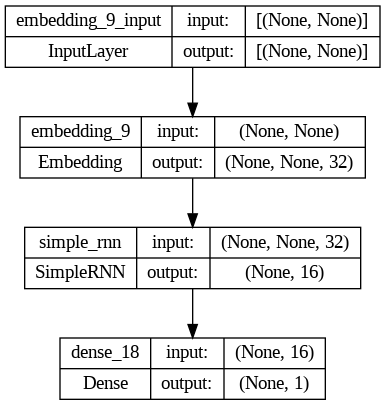

In [39]:
# Візуалізуємо шарову структуру моделі
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [40]:
model_name = 'model_RNN'

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Запускаємо навчання моделі на тренувальних даних для 10 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
157/157 [==============================] - 15s 91ms/step - loss: 0.7744 - acc: 0.5861 - val_loss: 0.6150 - val_acc: 0.7024
Epoch 2/10
157/157 [==============================] - 16s 99ms/step - loss: 0.5288 - acc: 0.7840 - val_loss: 0.4589 - val_acc: 0.8158
Epoch 3/10
157/157 [==============================] - 15s 93ms/step - loss: 0.4289 - acc: 0.8307 - val_loss: 0.4551 - val_acc: 0.7976
Epoch 4/10
157/157 [==============================] - 14s 91ms/step - loss: 0.3594 - acc: 0.8619 - val_loss: 0.3887 - val_acc: 0.8306
Epoch 5/10
157/157 [==============================] - 14s 92ms/step - loss: 0.3122 - acc: 0.8759 - val_loss: 0.3666 - val_acc: 0.8440
Epoch 6/10
157/157 [==============================] - 14s 92ms/step - loss: 0.2841 - acc: 0.8932 - val_loss: 0.3686 - val_acc: 0.8448
Epoch 7/10
157/157 [==============================] - 14s 88ms/step - loss: 0.2551 - acc: 0.9026 - val_loss: 7.9668 - val_acc: 0.6028
Epoch 8/10
157/157 [==============================] - 14s 92ms

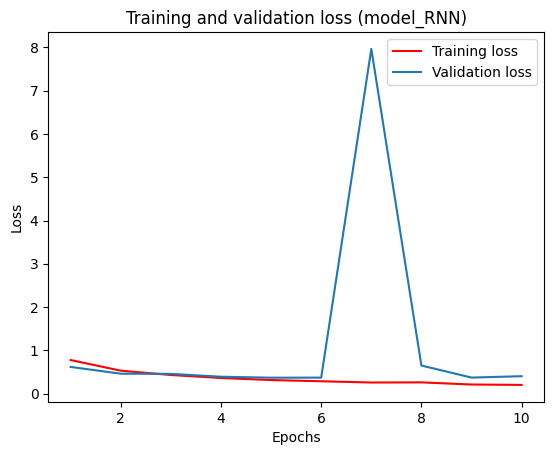

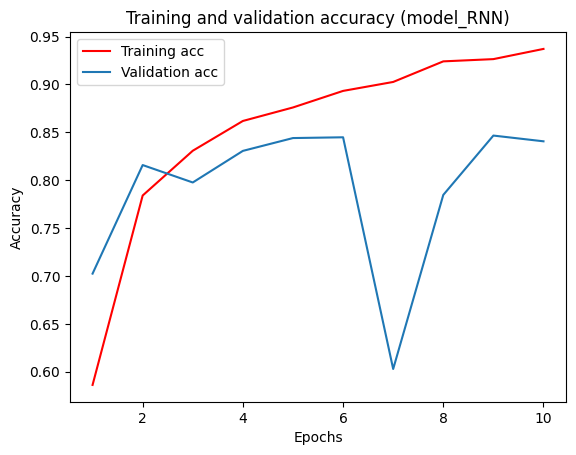

In [41]:
# Візуалізуємо результати навчання
plot_acc_loss()

#### 3. Рекурентна модель LSTM

(Long Short-Term Memory) - це вид рекурентних нейронних мереж, який спроектований для розв'язання проблеми зниклого градієнта (vanishing gradient problem), яка виникає при навчанні та тренуванні класичних RNN (рекурентних нейронних мереж)

In [42]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
from keras.regularizers import l2

In [43]:
model = Sequential([
    Embedding(max_features, output_dim=32, input_length=maxlen),
    # додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    Dropout(0.5),
    LSTM(64, activation="tanh"),
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # для бінарної класифікації
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 32)           480000    
                                                                 
 dropout_18 (Dropout)        (None, 500, 32)           0         
                                                                 
 lstm_15 (LSTM)              (None, 64)                24832     
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 513281 (1.96 MB)
Trainable params: 5132

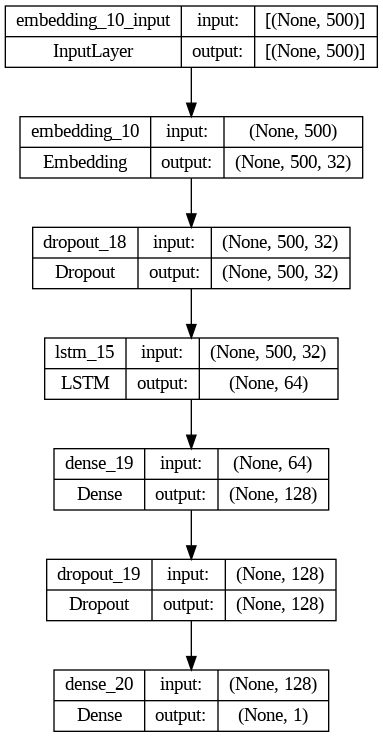

In [44]:
# Візуалізуємо шарову структуру моделі
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [45]:
model_name = 'model_LSTM'

history = model.fit(input_train, y_train, epochs=3, batch_size=128, validation_split=0.2)
# Запускаємо навчання моделі на тренувальних даних для 3 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини
# Після 3 епох починається перенавчання, тому обмежуємося 3 епохами

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/3
157/157 [==============================] - 75s 468ms/step - loss: 0.8536 - acc: 0.6816 - val_loss: 0.4189 - val_acc: 0.8494
Epoch 2/3
157/157 [==============================] - 73s 466ms/step - loss: 0.3232 - acc: 0.8853 - val_loss: 0.2996 - val_acc: 0.8900
Epoch 3/3
782/782 [==============================] - 33s 43ms/step - loss: 0.3088 - acc: 0.8823
Test accuracy: 0.8822799921035767


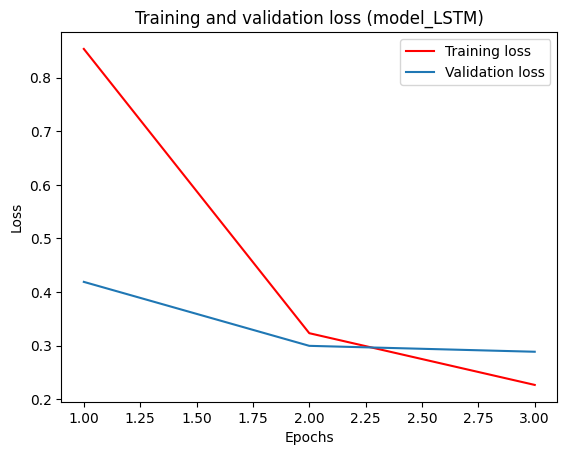

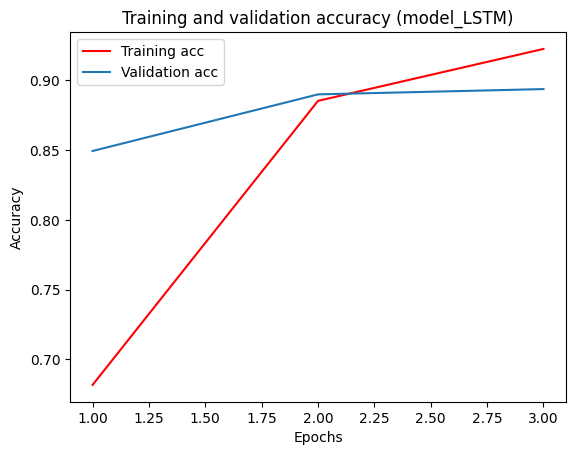

In [46]:
# Візуалізуємо результати навчання
plot_acc_loss()

#### 4. Двостороння рекурентна нейронна мережа (Bidirectional Recurrent Neural Network або BiRNN)

Тип нейронних мереж, який дозволяє моделі аналізувати вхідні дані в обидва напрямки: з початку до кінця і від кінця до початку


In [58]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
from keras.regularizers import l2

In [59]:
model = Sequential([
    Embedding(max_features, output_dim=32, input_length=maxlen),
    # додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    Dropout(0.5),
    Bidirectional(LSTM(64, activation="tanh")),
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # для бінарної класифікації
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 500, 32)           480000    
                                                                 
 dropout_24 (Dropout)        (None, 500, 32)           0         
                                                                 
 bidirectional_18 (Bidirect  (None, 128)               49664     
 ional)                                                          
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                     

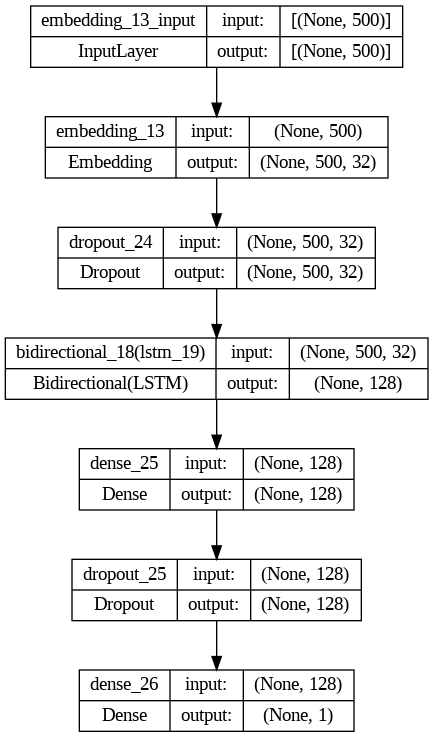

In [60]:
# Візуалізуємо шарову структуру моделі
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [61]:
model_name = 'model_BiRNN'

history = model.fit(input_train, y_train, epochs=2, batch_size=128, validation_split=0.2)
# Запускаємо навчання моделі на тренувальних даних для 2 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини
# Після 2 епох починається перенавчання, тому обмежуємося 2 епохами

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/2
157/157 [==============================] - 124s 768ms/step - loss: 1.0062 - acc: 0.6415 - val_loss: 0.4712 - val_acc: 0.8158
Epoch 2/2
782/782 [==============================] - 50s 63ms/step - loss: 0.3201 - acc: 0.8765
Test accuracy: 0.8765199780464172


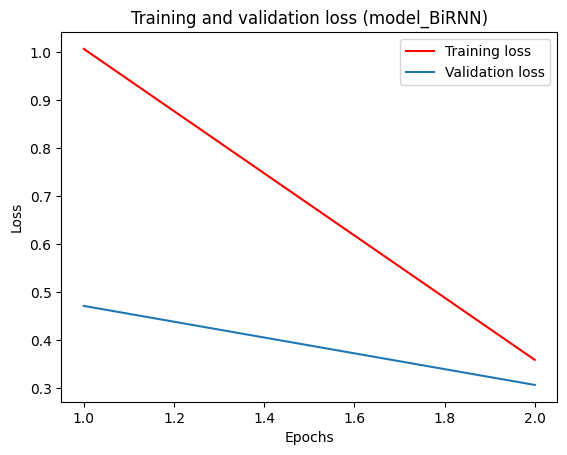

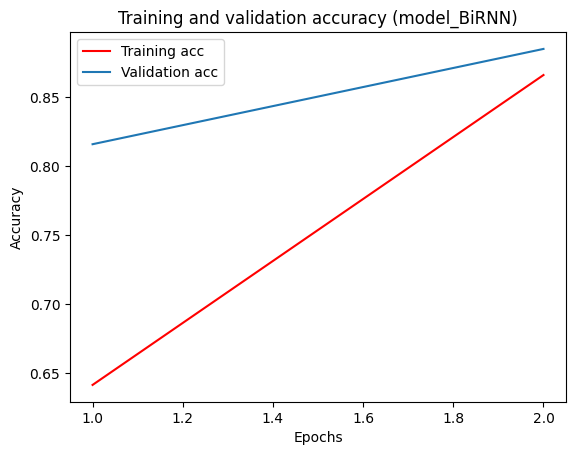

In [62]:
# Візуалізуємо результати навчання
plot_acc_loss()

#### 5. Глибока рекурентна нейронна мережа (Deep Recurrent Neural Network або Deep RNN)

Це рекурентна нейромережа, яка має більше одного рекурентного шару


In [23]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
from keras.regularizers import l2

In [24]:
model = Sequential([
    Embedding(max_features, output_dim=32, input_length=maxlen),
    # додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    Dropout(0.3),
    Bidirectional(LSTM(32, activation="tanh", return_sequences=True)),
    Bidirectional(LSTM(32, activation="tanh")),

    Dense(units=128, activation='relu', kernel_regularizer=l2(0.1)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # для бінарної класифікації
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           480000    
                                                                 
 dropout_8 (Dropout)         (None, 500, 32)           0         
                                                                 
 bidirectional_9 (Bidirecti  (None, 500, 64)           16640     
 onal)                                                           
                                                                 
 bidirectional_10 (Bidirect  (None, 64)                24832     
 ional)                                                          
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dropout_9 (Dropout)         (None, 128)              

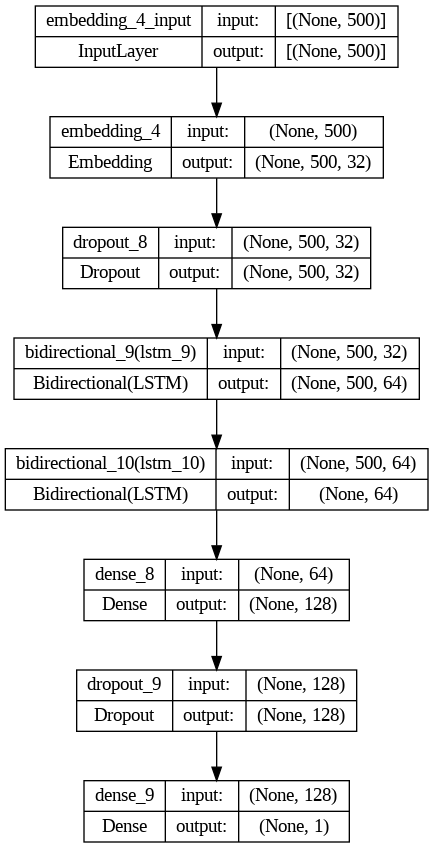

In [25]:
# Візуалізуємо шарову структуру моделі
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [26]:
model_name = 'model_DeepRNN'

history = model.fit(input_train, y_train, epochs=2, batch_size=128, validation_split=0.2)
# Запускаємо навчання моделі на тренувальних даних для 2 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини
# Після 2 епох починається перенавчання, тому обмежуємося 2 епохами

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/2
157/157 [==============================] - 120s 730ms/step - loss: 3.3310 - acc: 0.6824 - val_loss: 0.7468 - val_acc: 0.8390
Epoch 2/2
782/782 [==============================] - 67s 86ms/step - loss: 0.3511 - acc: 0.8685
Test accuracy: 0.8685200214385986


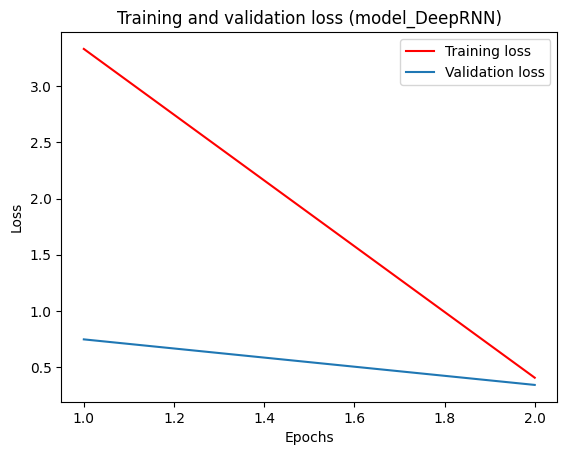

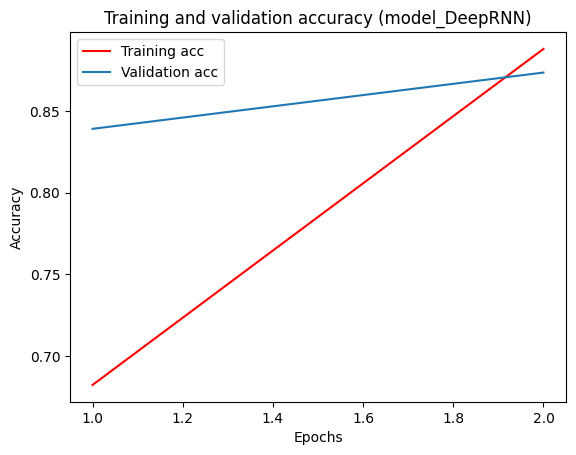

In [27]:
# Візуалізуємо результати навчання
plot_acc_loss()

#### Висновки

Отримано наступні величини Accuracy для різних архітектур рекурентних нейромереж:

- RNN - 83%;
- LSTM - 88%;
- BiRNN - 87%;
- Deep RNN - 86%.

Таким чином, архітектура LSTM виявилася найефективнішою. Додавання довгострокової пам'яті (Long Short-Term Memory) покращило здатність моделі розпізнавати та вивчати залежності у послідовностях.

Всі моделі, окрім RNN, схильні до перенавчання. Тому їм було обмежено кількість епох навчання.